# Text Processing Sushil

## Import & Setup

In [ ]:
# Text processing & utilities
import pandas as pd
import re
import emoji
import time
from collections import Counter

# Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# NLP: Stem, Stopword
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
nltk.download('punkt_tab')

# Visualization setting
pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\walkervalentinus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\walkervalentinus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## Define Utility Functions

### Emoji Cleaning

In [2]:
def remove_emoji(text):
    return emoji.replace_emoji(text, replace="") if isinstance(text, str) else text

In [3]:
def extract_emoji_description(text):
    return emoji.demojize(text) if isinstance(text, str) else text

In [4]:
def clean_emoji_desc(text):
    if isinstance(text, str):
        return text.replace("::", " ").replace(":", "").replace("-", " ").replace("_", " ")
    return text

### Text Cleaning

In [6]:
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|\b(gurl|rurl|url|<url>)\b", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"[^\w\s-]", "", text).replace("-", " ")
    text = re.sub(r"\b(rt|shashtag|hashtag|user|co|uk|ufc)\b|<user>|<hashtag>", "", text)
    text = emoji.replace_emoji(text, replace="")
    text = re.sub(r"\n", " ", text)
    text = re.sub(r'\bRT\b', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

### Stemming & Stopword Removal

In [7]:
stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words('english'))

## Load Dataset & Emoji Preprocessing

In [8]:
df = pd.read_csv('dataset/Sushil/train_emoji.csv')
df['tweet without emoji'] = df['tweets'].apply(remove_emoji)
df['emoji description'] = df['emoji'].apply(extract_emoji_description).apply(clean_emoji_desc)
df['tweet with emoji description'] = df['tweet without emoji'] + ' ' + df['emoji description']

In [9]:
df["cleaned tweet we"] = df['tweet without emoji'].apply(clean_text)
df["cleaned tweet ed"] = df['tweet with emoji description'].apply(clean_text)

## Stemming and Stopword 

In [10]:
df["Text Stemmed"] = df["cleaned tweet we"].apply(lambda text: ' '.join([stemmer.stem(word) for word in word_tokenize(text)]))
df["Text with Emoji Stemmed"] = df["cleaned tweet ed"].apply(lambda text: ' '.join([stemmer.stem(word) for word in word_tokenize(text)]))

df["No Stopword Text"] = df["Text Stemmed"].apply(lambda text: ' '.join([word for word in word_tokenize(text) if word.lower() not in stop_words]))
df["Text with Emoji no Stopword"] = df["Text with Emoji Stemmed"].apply(lambda text: ' '.join([word for word in word_tokenize(text) if word.lower() not in stop_words]))

## Save Final Dataset

In [11]:
df.to_csv("dataset/Sushil/final.csv", index=False)

df_final = df[["No Stopword Text", "Text with Emoji no Stopword", "labels"]].dropna().drop_duplicates()
df_final.to_csv("dataset/Sushil/clean.csv", index=False)

## WordCloud & Frequency

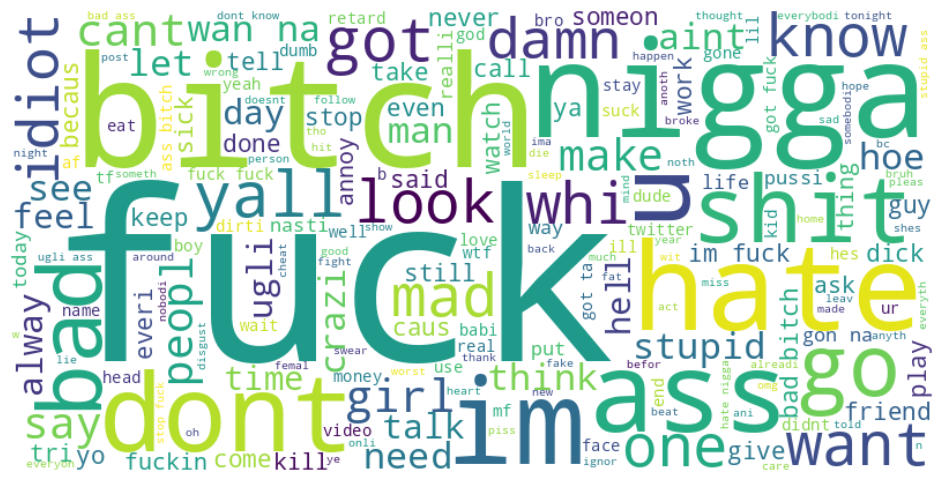

[('fuck', 2118),
 ('bitch', 678),
 ('ass', 469),
 ('nigga', 423),
 ('like', 409),
 ('im', 395),
 ('hate', 378),
 ('get', 345),
 ('dont', 319),
 ('bad', 258)]

In [12]:
hs_text = ' '.join(df_final[df_final["labels"] == 1]["No Stopword Text"])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(hs_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Counter(hs_text.split()).most_common(10)